In [22]:
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


## Step 1: Load and Process Data

To demonstrate how clustering finds similar data points, we will be using the MNIST dataset of hand-written digits from 0-9.

In [23]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [24]:
#Normalize data between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [25]:
print(x_train_flat.shape)

(60000, 784)


## Step 2: Train the Model

Unlike supervised learning, there are expected to be no labels in unsupervised learning. Therefore, only the flattened image data will be used for the clustering model. The way clustering works is that it chooses n points in the feature space, and then tries to minimize the distance between each point and the surrounding data points.

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_train_flat)

KMeans(n_clusters=10, random_state=42)

## Step 3: Visualizing the Clusters

Since the model was not trained with labels, accuracy cannot be used as a metric. Instead, clusters are usually evaluated on how dense they are and how far they are from other clusters. For this example, we will simply inspect the results visually.

In [27]:
test_pred = kmeans.predict(x_test_flat)

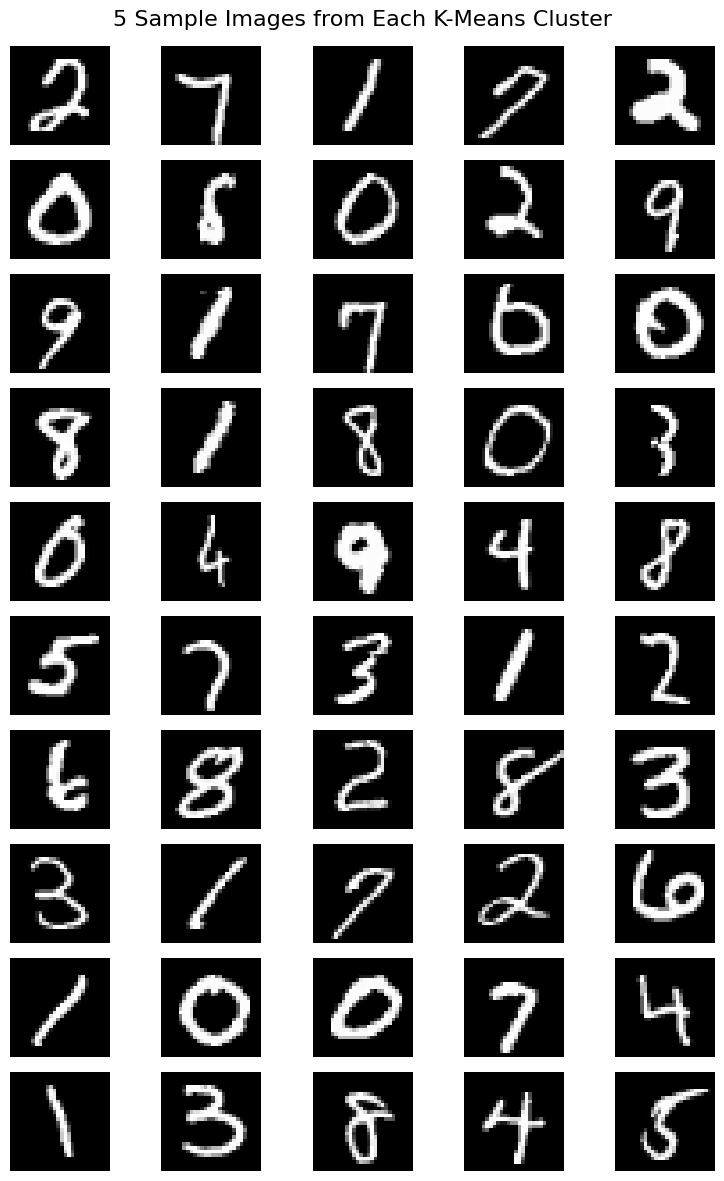

In [28]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(10, 5, figsize=(8, 12))
fig.suptitle("5 Sample Images from Each K-Means Cluster", fontsize=16)

for cluster_id in range(10):
    cluster_idxs = np.where(test_pred == cluster_id)[0]
    chosen_idxs = np.random.choice(cluster_idxs, size=5, replace=False)
    for i, idx in enumerate(chosen_idxs):
        ax = axes[cluster_id, i]
        ax.imshow(x_train[idx], cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()